In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving my_movies.csv to my_movies.csv


In [6]:
data = pd.read_csv('my_movies.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
df = pd.get_dummies(data)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Apriori Algorithm

Association with 10% Support and 70%

In [23]:
frequent_items = apriori(df, min_support = 0.1, use_colnames = True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V5_LOTR2, Harry Potter1, Green Mile, V3_Harry..."
1393,0.1,"(V5_LOTR2, Green Mile, LOTR2, V3_Harry Potter1..."
1394,0.1,"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V..."
1395,0.1,"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V..."


In [25]:
rules = association_rules(frequent_items, metric = 'lift', min_threshold = 0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
64247,(LOTR1),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64248,(V2_LOTR1),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64249,(V1_Sixth Sense),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64250,(V4_Green Mile),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [26]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
64247,(LOTR1),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64248,(V2_LOTR1),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64249,(V1_Sixth Sense),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64250,(V4_Green Mile),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


### Visualization of obtained rule

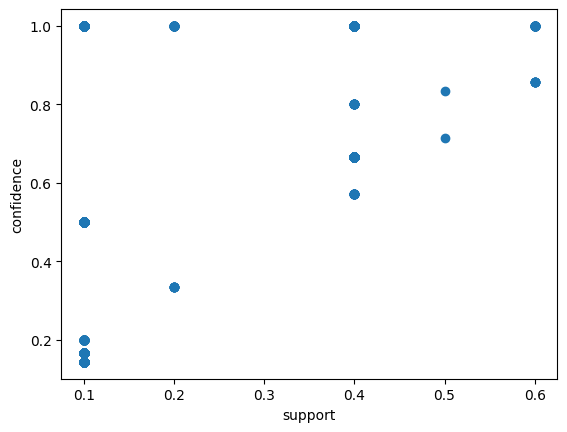

In [27]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

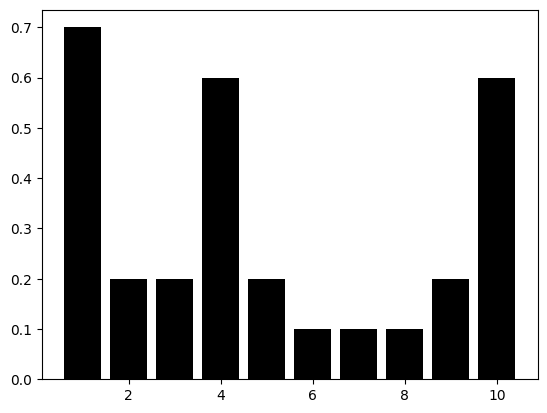

In [32]:
plt.bar(x = list(range(1,11)), height = frequent_items.support[1:11],color='black')
plt.show()

## Association rules, 5% support and 90% confidence

In [33]:
#Apriori Alogrithm
frequent_items1=apriori(df,min_support=0.05,use_colnames=True)
frequent_items1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V5_LOTR2, Harry Potter1, Green Mile, V3_Harry..."
1393,0.1,"(V5_LOTR2, Green Mile, LOTR2, V3_Harry Potter1..."
1394,0.1,"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V..."
1395,0.1,"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V..."


In [34]:
rules1=association_rules(frequent_items1,metric='lift',min_threshold=0.9)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
64211,(LOTR1),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64212,(V2_LOTR1),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64213,(V1_Sixth Sense),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64214,(V4_Green Mile),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [36]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
64211,(LOTR1),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64212,(V2_LOTR1),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
64213,(V1_Sixth Sense),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
64214,(V4_Green Mile),"(V5_LOTR2, Harry Potter1, Green Mile, LOTR2, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


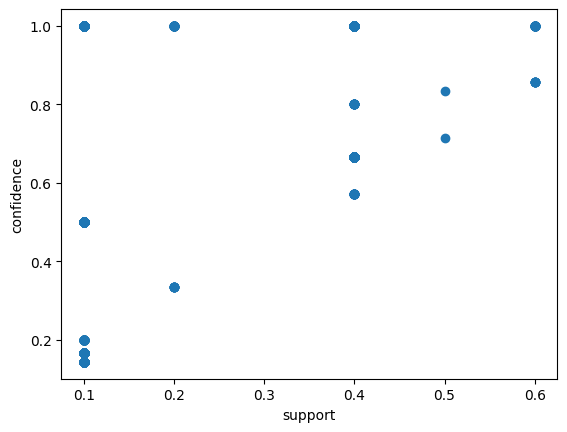

In [37]:
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

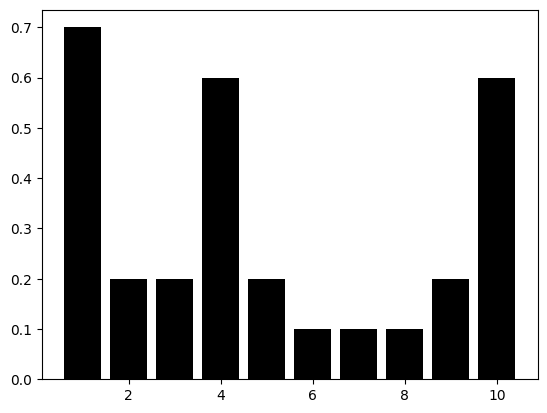

In [38]:
plt.bar(x = list(range(1,11)), height =frequent_items1.support[1:11],color='black')
plt.show()